# Homework - Generalized Linear Models (6 pts)

In [31]:
import numpy as np

# time series for stimulus and and associated # of spikes
stim = np.load('hw-glm-stim.npy')
spikes = np.load('hw-glm-spikes.npy')

spikes.shape, stim.shape

((20000,), (20000,))

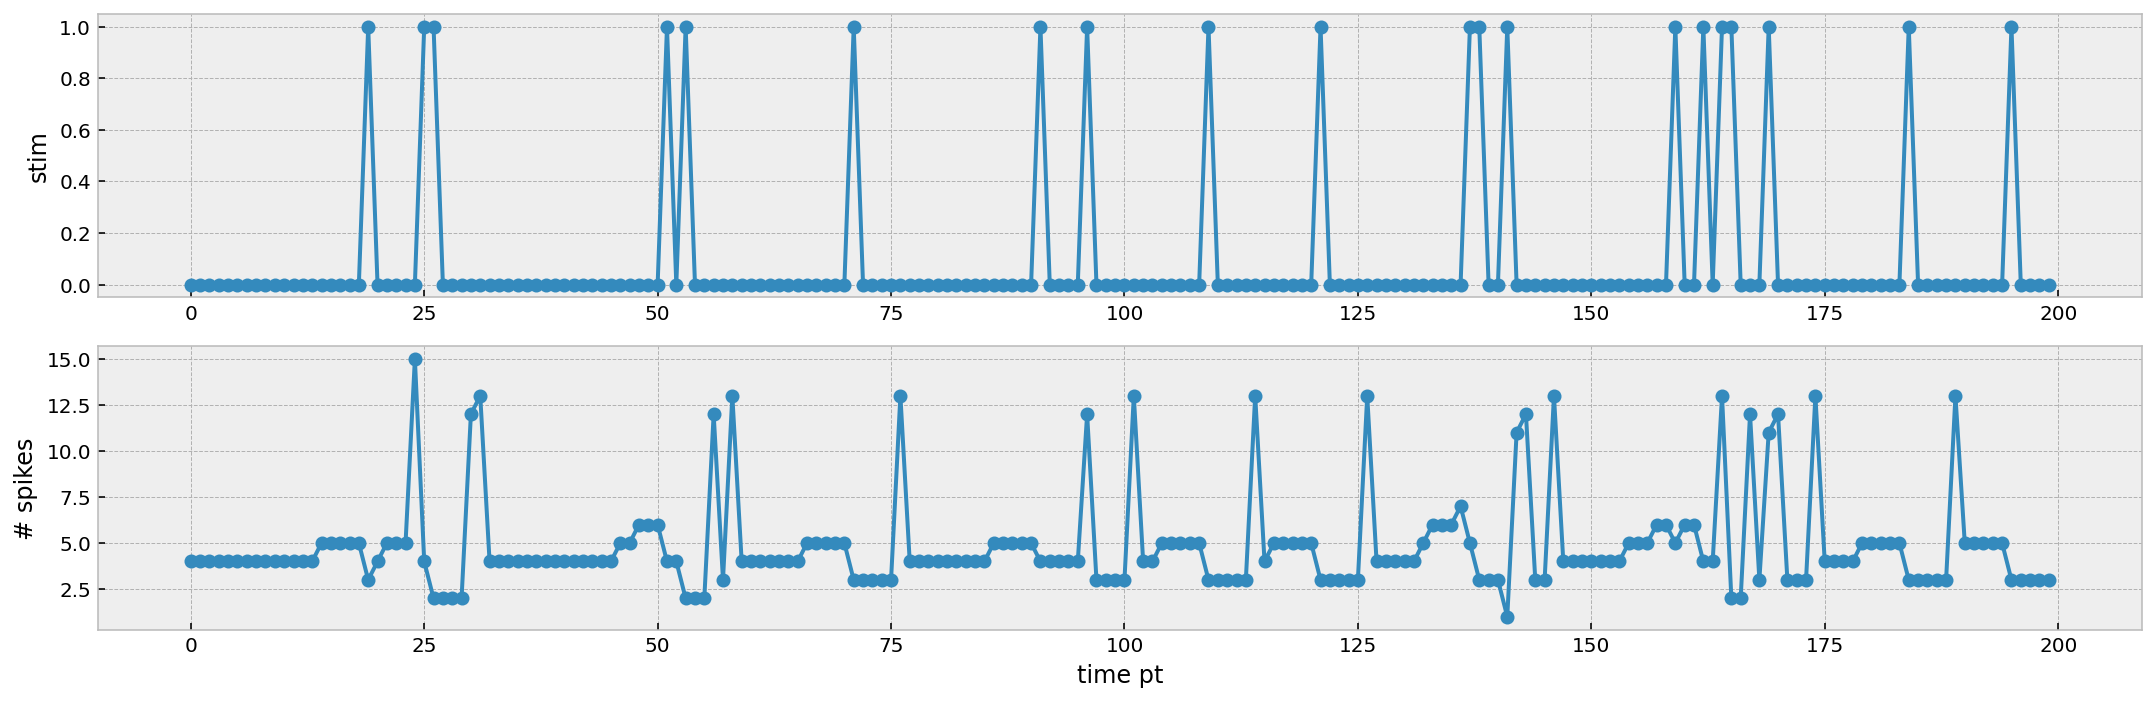

In [40]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [15, 5]

plt.subplot(211)
plt.plot(stim[:200], 'o-')
plt.ylabel('stim')
plt.subplot(212)
plt.plot(spikes[:200], 'o-')
plt.xlabel('time pt')
plt.ylabel('# spikes')
plt.tight_layout();

For the questions below, use a Poisson GLM to model the # of spikes at each time point $t$ as a function of the stimulus for the preceding 11 time points (inclusive of the current time point $t$).

1. (3 pts) Construct an input matrix $X$ whose columns are the time-lagged stimulus series.

In [36]:
T = len(stim)
d = 11
X = np.zeros((T, d))
zstim = np.hstack([np.zeros(d-1), stim])
for t in range(T):
    X[t,:] = zstim[t:t+d]

2. (3 pts) Build a Poisson GLM model (set alpha=0) to describe the # of spikes at each time point based on the input matrix $X$ you constructed above. Plot the observed number of spikes overlaid with the model's prediction for the first 200 time points.

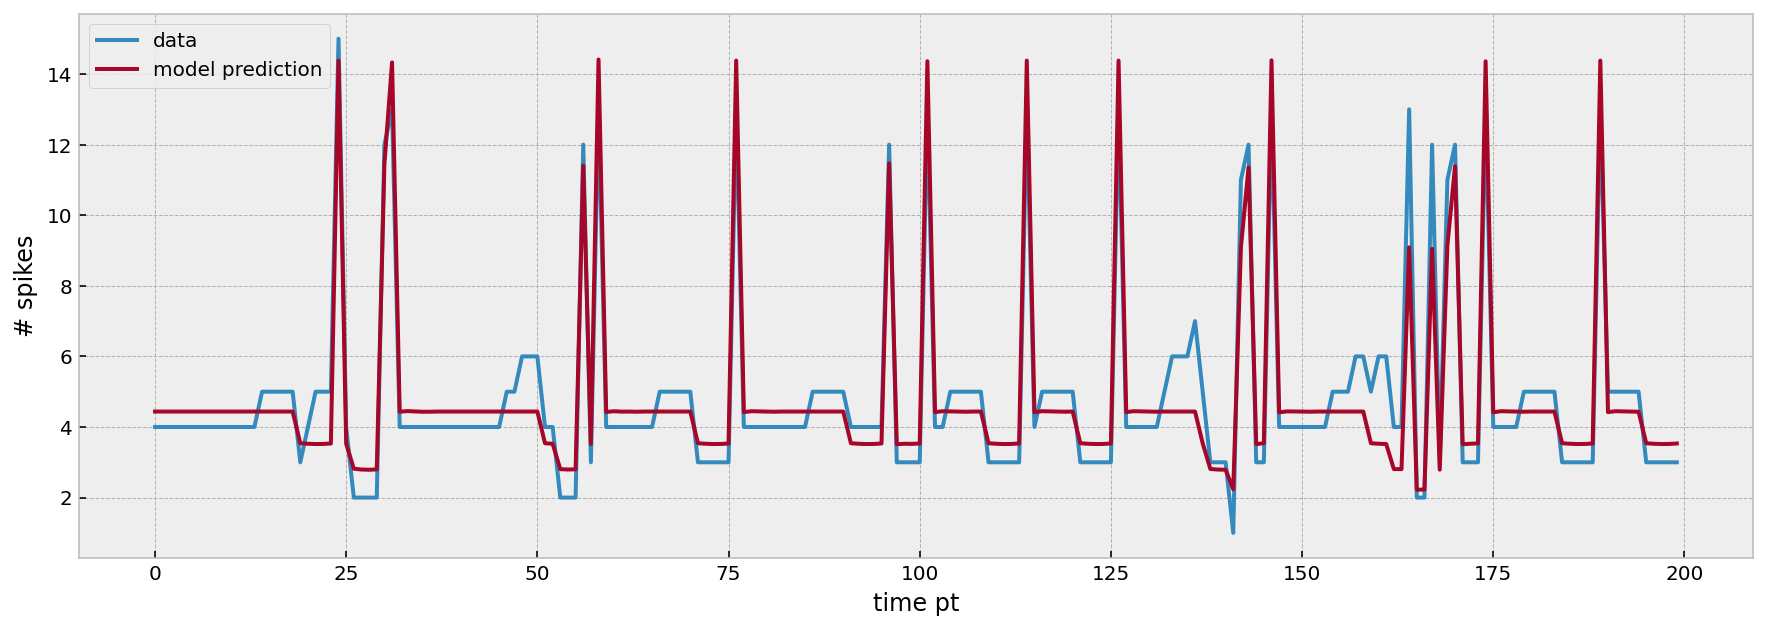

In [37]:
from sklearn.linear_model import PoissonRegressor

model = PoissonRegressor(alpha=0)
model.fit(X, spikes)
predicted_spikes = model.predict(X)

plt.plot(spikes[:200], label='data')
plt.plot(predicted_spikes[:200], label='model prediction')
plt.xlabel('time pt')
plt.ylabel('# spikes')
plt.legend();